In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [7]:
summary_statistics = pd.read_csv("summary_statistics.csv")
summary_statistics.head()

,file,variables,constraints,nonzeros,density,sparsity_%,row_nnz_variance,col_nnz_variance,min_coefficient,max_coefficient,mean_coefficient,std_coefficient,integer_like_%,matrix_rank,avg_row_L2_norm,max_row_L2_norm,zero_rows,zero_columns
0,50v-10,2013,233,2745,0.005853,99.414748,5.922047,0.595041,-216.0,1.0,-43.466667,62.082597,100.000000,232,231.340446,293.513202,0,0
1,air05,7195,426,52121,0.017005,98.299517,7091.870622,3.601867,1.0,1.0,1.000000,0.000000,100.000000,367,10.359497,20.099751,0,0
2,app1-1,2480,4926,18275,0.001496,99.850407,12.640369,3104.559439,-1.0,1.0,0.096302,0.772661,60.355677,2480,1.423756,7.000000,0,0
3,assign1-5-8,156,161,3720,0.148113,85.188724,63.771459,71.681460,-5.0,1.0,-1.962366,1.345515,100.000000,156,10.668728,14.628739,0,0
4,b1c1s1,3872,3904,11408,0.000755,99.924532,12.391477,3.745048,-480.0,50.0,-41.872931,137.725341,96.633941,3584,128.017207,480.001042,0,0


In [61]:
summary_statistics.describe()

,variables,constraints,nonzeros,density,sparsity_%,row_nnz_variance,col_nnz_variance,min_coefficient,max_coefficient,mean_coefficient,std_coefficient,integer_like_%,matrix_rank,avg_row_L2_norm,max_row_L2_norm,zero_rows,zero_columns,nonzeros_normalized,constraint_variable_ratio,cluster
count,94.000000,94.000000,9.400000e+01,94.000000,94.000000,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,94.000000,94.000000,9.400000e+01,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000
mean,2479.702128,2118.680851,5.721414e+04,0.086225,91.377489,4.443851e+04,2.026298e+04,-1.055517e+06,1.066437e+06,-3.504013e+04,1.281949e+05,90.658380,1397.872340,1.365139e+05,3.378086e+07,24.563830,12.042553,0.086225,1.320838,0.914894
std,2207.072200,2242.010389,2.081591e+05,0.217317,21.731740,3.061980e+05,1.453451e+05,9.352668e+06,1.031395e+07,2.395310e+05,8.991894e+05,22.183151,1576.942538,9.226266e+05,3.089157e+08,237.634288,84.817567,0.217317,3.044582,0.650220
min,30.000000,4.000000,1.230000e+02,0.000409,6.300813,0.000000e+00,0.000000e+00,-9.038285e+07,1.000000e+00,-1.676996e+06,0.000000e+00,0.000000,4.000000,1.423756e+00,3.000000e+00,0.000000,0.000000,0.000409,0.007086,0.000000
25%,551.250000,397.500000,3.205500e+03,0.002068,97.371691,5.957413e+00,1.108787e+00,-9.657500e+02,1.000000e+00,-9.851998e+00,1.354413e+00,96.322631,273.250000,5.972677e+00,1.599649e+01,0.000000,0.000000,0.002068,0.355277,1.000000
50%,2098.000000,1227.000000,1.084250e+04,0.005924,99.407646,6.036921e+01,1.667326e+01,-1.179211e+01,1.645877e+01,5.130624e-01,2.886533e+01,100.000000,914.000000,7.002530e+01,3.458630e+02,0.000000,0.000000,0.005924,0.736111,1.000000
75%,3534.250000,4110.250000,2.641425e+04,0.026283,99.793236,7.739230e+02,8.723198e+01,-1.000000e+00,4.195000e+02,1.267800e+01,3.125321e+02,100.000000,1919.750000,4.492642e+02,6.987500e+03,0.000000,0.000000,0.026283,1.411207,1.000000
max,8644.000000,8580.000000,1.761016e+06,0.936992,99.959052,2.935609e+06,1.374000e+06,1.000000e+00,1.000000e+08,5.709128e+03,8.087541e+06,100.000000,8467.000000,7.445455e+06,2.991952e+09,2304.000000,742.000000,0.936992,28.593458,4.000000


Text(0.5, 1.0, 'Distribution of Matrix Densities')

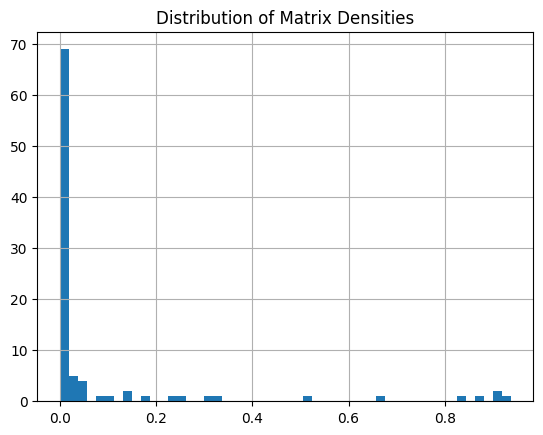

In [13]:
summary_statistics['density'].hist(bins=50)
plt.title('Distribution of Matrix Densities')

Text(0.5, 1.0, 'Distribution of Constraints')

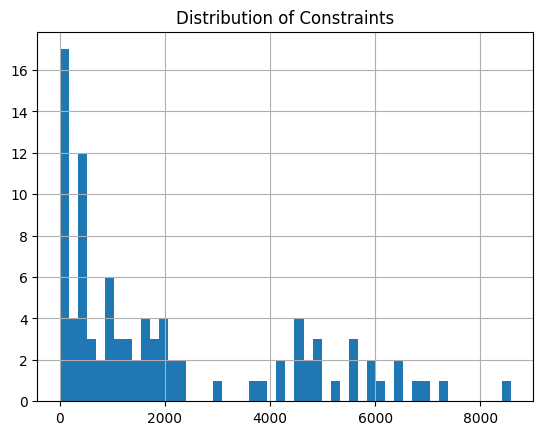

In [24]:
summary_statistics['constraints'].hist(bins=50)
plt.title('Distribution of Constraints')

Text(0.5, 1.0, 'Distribution of Variables')

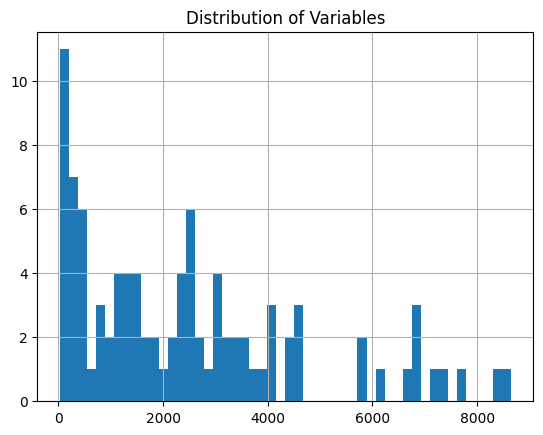

In [25]:
summary_statistics['variables'].hist(bins=50)
plt.title('Distribution of Variables')

Text(0.5, 1.0, 'Distribution of Matrix Rank')

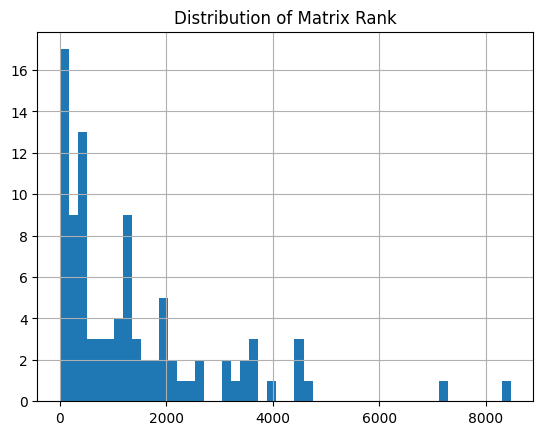

In [27]:
summary_statistics['matrix_rank'].hist(bins=50)
plt.title('Distribution of Matrix Rank')

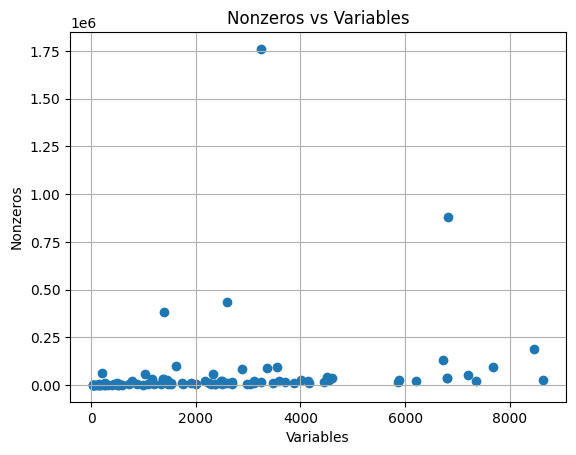

In [32]:
plt.scatter(summary_statistics['variables'], summary_statistics['nonzeros'])
plt.xlabel('Variables')
plt.ylabel('Nonzeros')
plt.title('Nonzeros vs Variables')
plt.grid(True)

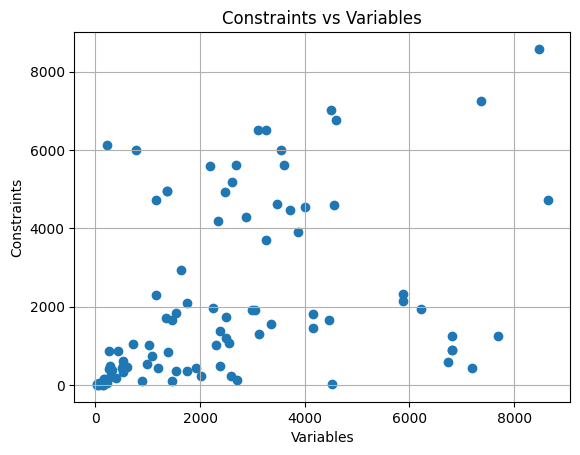

In [33]:
plt.scatter(summary_statistics['variables'], summary_statistics['constraints'])
plt.xlabel('Variables')
plt.ylabel('Constraints')
plt.title('Constraints vs Variables')
plt.grid(True)

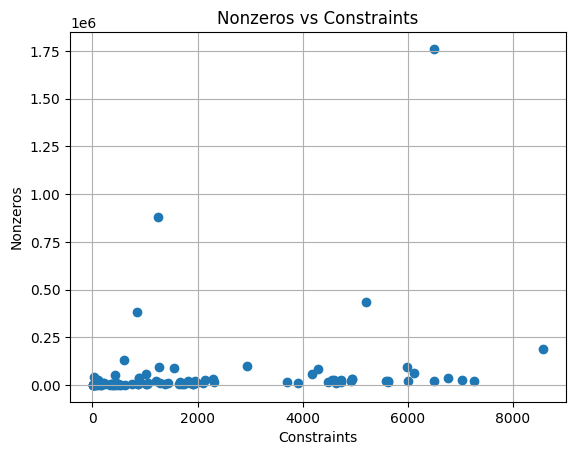

In [38]:
plt.scatter(summary_statistics['constraints'], summary_statistics['nonzeros'])
plt.xlabel('Constraints')
plt.ylabel('Nonzeros')
plt.title('Nonzeros vs Constraints')
plt.grid(True)
plt.show()

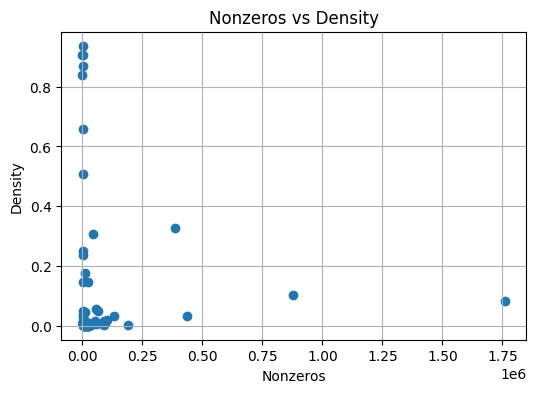

In [39]:
plt.figure(figsize=(6, 4))
plt.scatter(summary_statistics['nonzeros'], summary_statistics['density'])
plt.xlabel('Nonzeros')
plt.ylabel('Density')
plt.title('Nonzeros vs Density')
plt.grid(True)
plt.show()

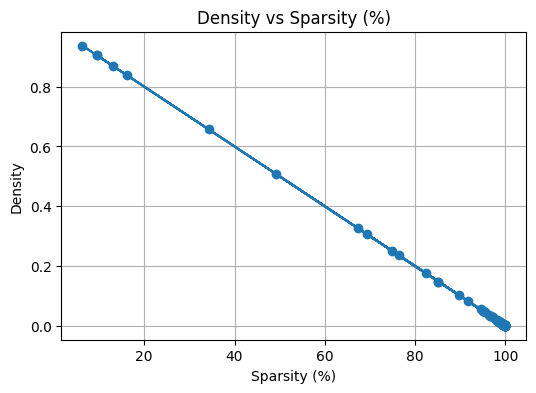

In [40]:
plt.figure(figsize=(6, 4))
plt.plot(summary_statistics['sparsity_%'], summary_statistics['density'], 'o-')
plt.xlabel('Sparsity (%)')
plt.ylabel('Density')
plt.title('Density vs Sparsity (%)')
plt.grid(True)
plt.show()

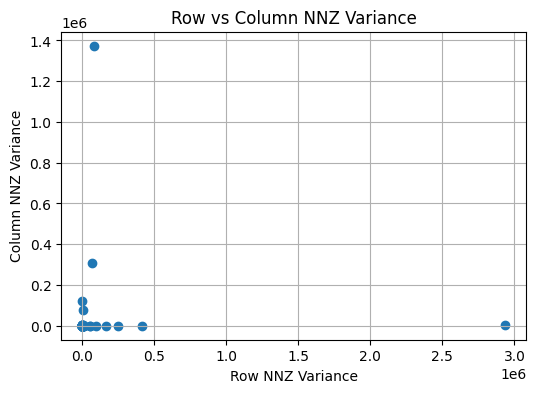

In [41]:

plt.figure(figsize=(6, 4))
plt.scatter(summary_statistics['row_nnz_variance'], summary_statistics['col_nnz_variance'])
plt.xlabel('Row NNZ Variance')
plt.ylabel('Column NNZ Variance')
plt.title('Row vs Column NNZ Variance')
plt.grid(True)
plt.show()

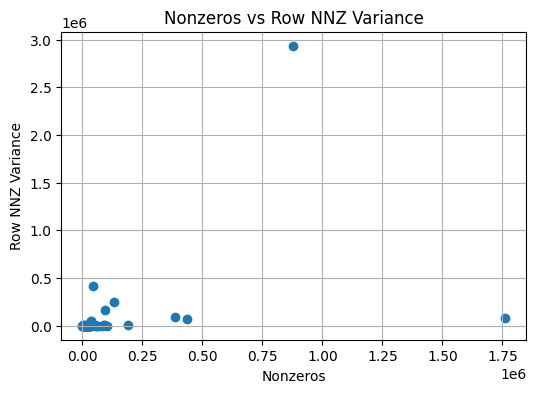

In [42]:
plt.figure(figsize=(6, 4))
plt.scatter(summary_statistics['nonzeros'], summary_statistics['row_nnz_variance'])
plt.xlabel('Nonzeros')
plt.ylabel('Row NNZ Variance')
plt.title('Nonzeros vs Row NNZ Variance')
plt.grid(True)
plt.show()

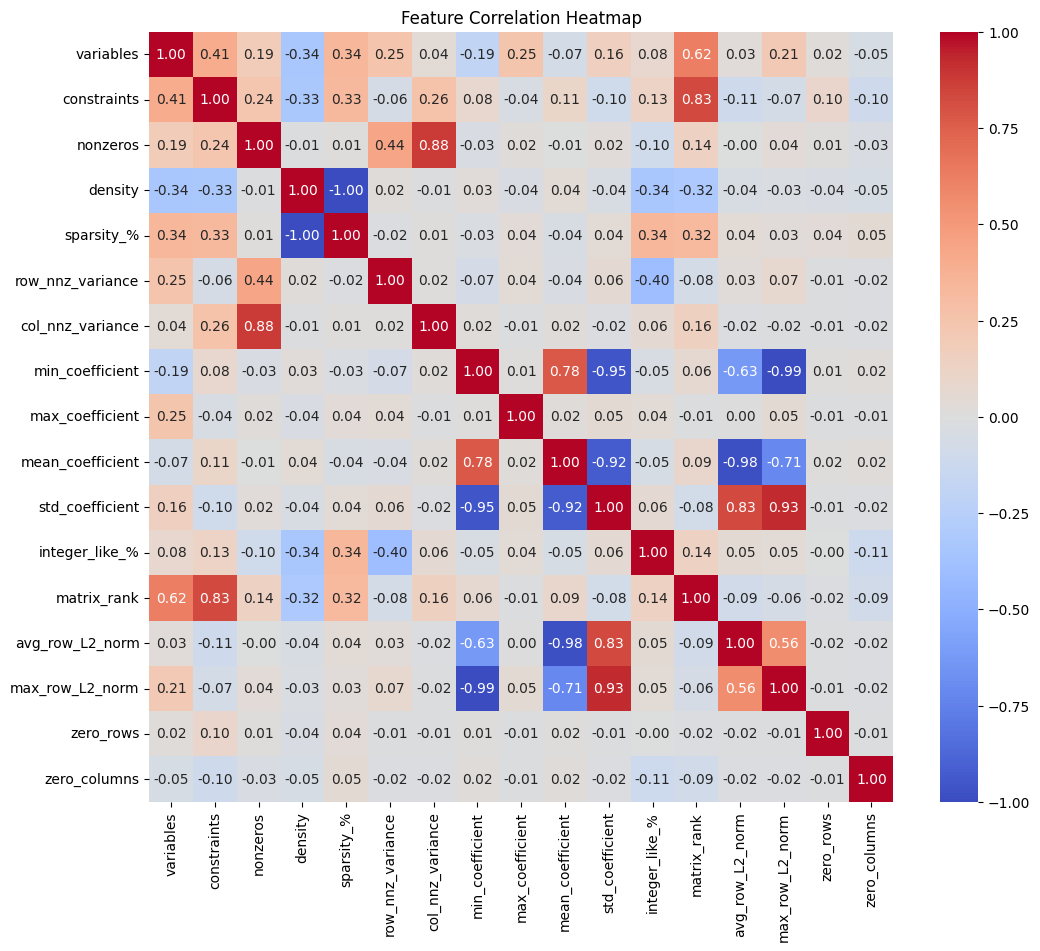

In [22]:
numeric_df = summary_statistics.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10)) 
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

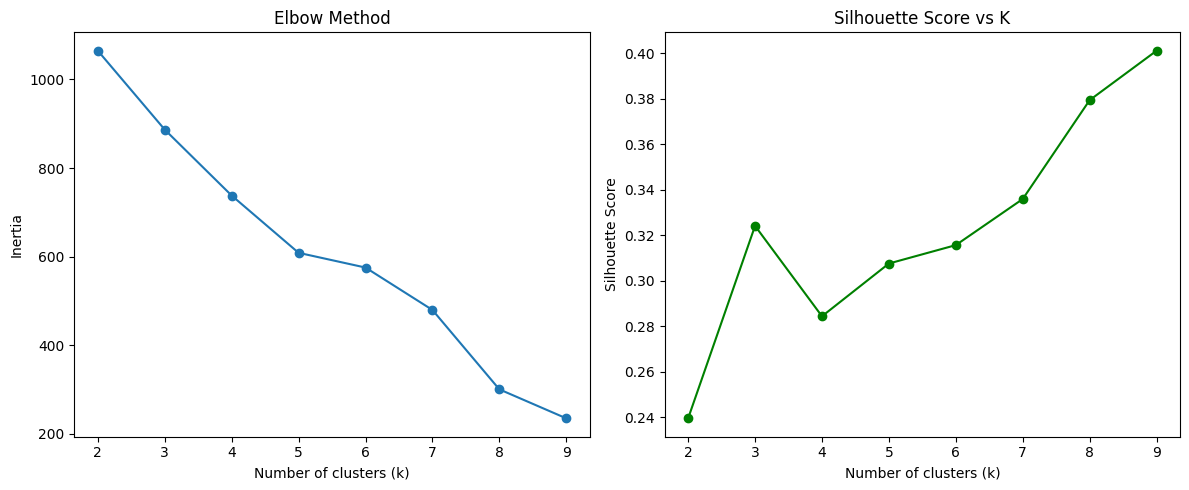

In [48]:
features = [
    'variables', 'constraints', 'nonzeros', 'density', 'sparsity_%',
    'row_nnz_variance', 'col_nnz_variance',
    'avg_row_L2_norm', 'max_row_L2_norm',
    'integer_like_%', 'matrix_rank',
    'zero_rows', 'zero_columns'
]

X = summary_statistics[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow method
inertia = []
silhouette_scores = []

K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'o-g')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')

plt.tight_layout()
plt.show()

best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init='auto')
summary_statistics['cluster'] = kmeans.fit_predict(X_scaled)


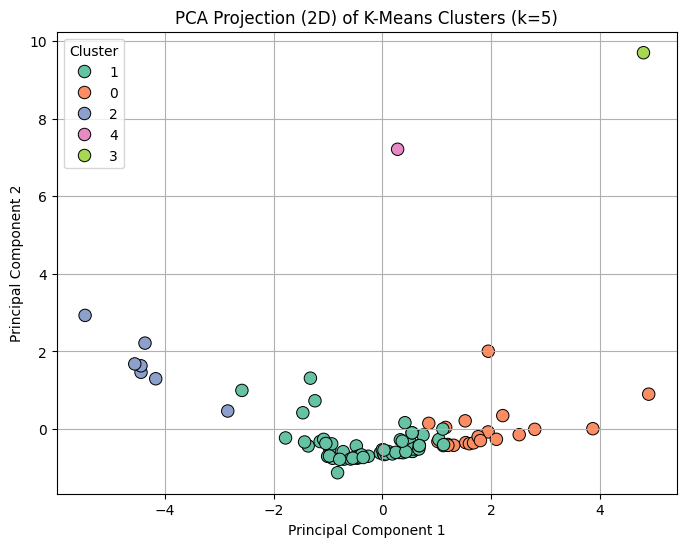

In [50]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=summary_statistics['cluster'].astype(str),
                palette='Set2', s=80, edgecolor='black')
plt.title('PCA Projection (2D) of K-Means Clusters (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


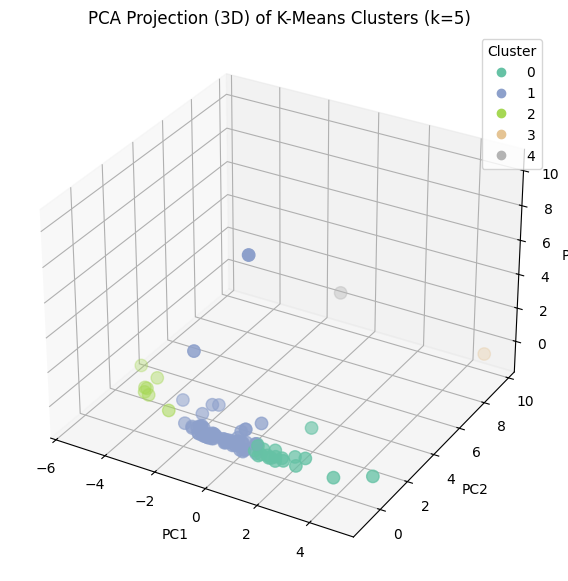

In [53]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=summary_statistics['cluster'], cmap='Set2', s=80)
ax.set_title('PCA Projection (3D) of K-Means Clusters (k=5)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

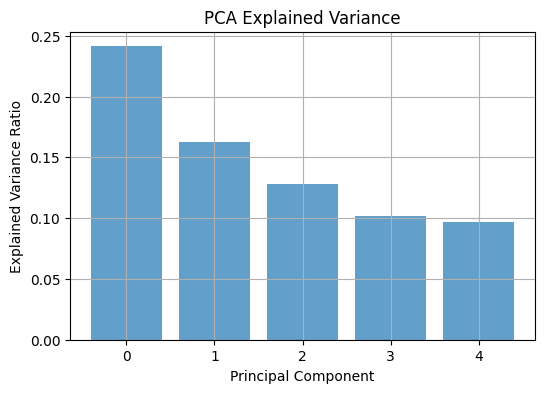

In [55]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.bar(range(0, 5), explained_var, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


In [51]:
# Cluster centers (scaled space)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centers:")
print(cluster_centers.round(2))

Cluster Centers:
   variables  constraints    nonzeros  density  sparsity_%  row_nnz_variance  \
0    4243.55      5307.80    55193.75     0.00       99.69           3771.78   
1    2117.05      1309.14    25031.58     0.03       96.56          16683.07   
2      77.71        21.43     1053.29     0.80       19.74             25.28   
3    3253.00      6505.00  1761016.00     0.08       91.68          81598.61   
4    6816.00      1251.00   878812.00     0.10       89.69        2935608.95   

   col_nnz_variance  avg_row_L2_norm  max_row_L2_norm  integer_like_%  \
0          19550.25           467.72          3569.82           91.76   
1           2066.49        195586.27      48849001.38           94.13   
2              7.22         15667.10         20319.47           66.69   
3        1374000.02           173.90          1655.50          100.00   
4           5342.78             2.52             9.80            1.74   

   matrix_rank  zero_rows  zero_columns  
0      3826.00       

In [52]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
explained = pca.explained_variance_ratio_
components = pd.DataFrame(pca.components_, columns=features)
print("Explained Variance:", explained)
print("Top PCA Components:\n", components)


Explained Variance: [0.24127594 0.16259156 0.12844779 0.10186479 0.09710075]
Top PCA Components:
    variables  constraints  nonzeros   density  sparsity_%  row_nnz_variance  \
0   0.379463     0.432824  0.183574 -0.424976    0.424976          0.012460   
1   0.074386     0.097267  0.597323  0.275046   -0.275046          0.371322   
2   0.162536    -0.207758  0.069054 -0.108130    0.108130          0.239445   
3  -0.364636    -0.063390  0.234623 -0.018493    0.018493         -0.478160   
4  -0.179418    -0.292261  0.183481 -0.406425    0.406425          0.278649   

   col_nnz_variance  avg_row_L2_norm  max_row_L2_norm  integer_like_%  \
0          0.179033        -0.009992         0.026695        0.201047   
1          0.489696        -0.049407        -0.007645       -0.304203   
2         -0.046877         0.625566         0.647719       -0.015485   
3          0.505862         0.161578         0.061346        0.503457   
4          0.098560        -0.183094        -0.235406       -0